# Исследование A/B теста в компании 

Необходимо на основании приведённых данных дать ответ о наличии различий в группах А и В проводившегося теста, провести приоритезацию гипотез

# Описание данных 

Файл hypothesis.csv. \
Hypothesis — краткое описание гипотезы; \
Reach — охват пользователей по 10-балльной шкале; \
Impact — влияние на пользователей по 10-балльной шкале; \
Confidence — уверенность в гипотезе по 10-балльной шкале; \
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл orders.csv: \
transactionId — идентификатор заказа; \
visitorId — идентификатор пользователя, совершившего заказ; \
date — дата, когда был совершён заказ; \
revenue — выручка заказа; \
group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv: \
date — дата; \
group — группа A/B-теста; \
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Начало работы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Это скорее подсобный датасет, изменять ничего не нужно
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
# Здесь необходимо было изменить только тип данных, всё остальное в порядке
orders['date'] = pd.to_datetime(orders['date'])

In [6]:
# Приведём названия столбоцов в нижний регистр
orders.columns = orders.columns.str.lower()

In [7]:
# Посмотрим, нет ли пользователей, которые находятся в обеих группах
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
orders_doub = orders_a.query('visitorid in (@orders_b["visitorid"])')
orders = orders.query('visitorid not in (@orders_doub["visitorid"])')

In [8]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
# Аналогично с предыдущим
visitors['date'] = pd.to_datetime(visitors['date'])

## Приоритезация гипотез 

### С помощью ICE

In [10]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

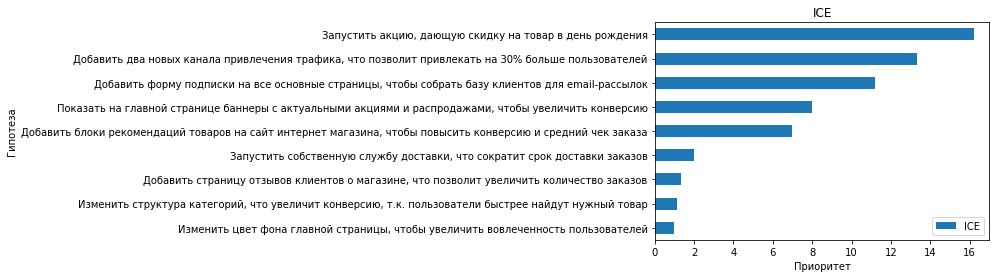

In [11]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### С помощью RICE

In [12]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

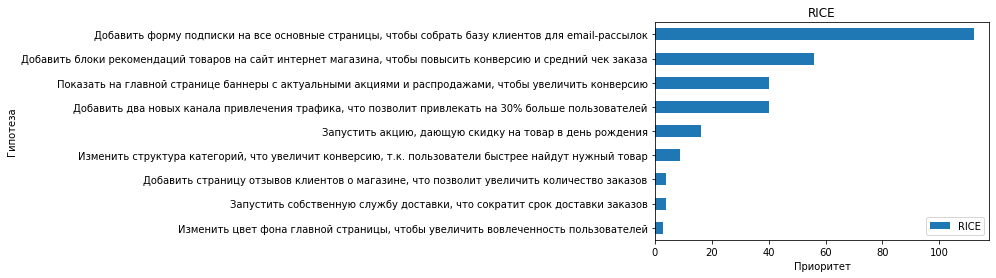

In [13]:
ax2 = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax2.set_xlabel('Приоритет')
ax2.set_ylabel('Гипотеза')
ax2.set_title('RICE')
plt.show()

Изменение в рангах гипотез есть только из-за значения охвата \
Из этого следует, что акция на день рождения даст хороший импакт, но вот охват будет небольшой \
А вот форма подписки дост боооольшущий охват, вот гипотеза и вырвалась вперёд

## Анализ A/B теста

In [14]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [15]:
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [16]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

### Кумулятивная выручка по группам

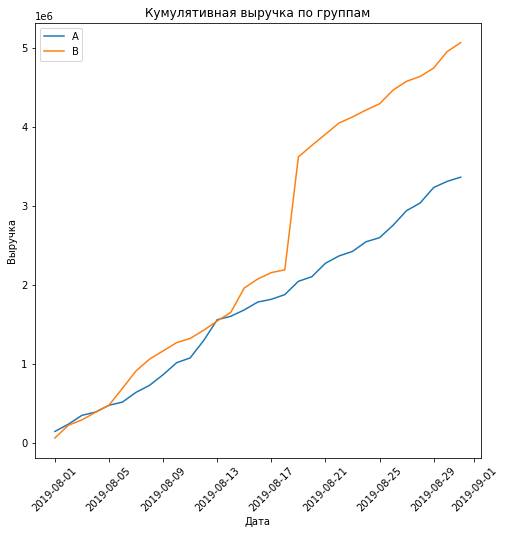

In [17]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.figure(figsize=(8,8))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('Кумулятивная выручка по группам')
plt.ylabel("Выручка")
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

У группы В в районе 17 числа есть сильный рост, будем посмотреть

### Кумулятивный средний чек по группам

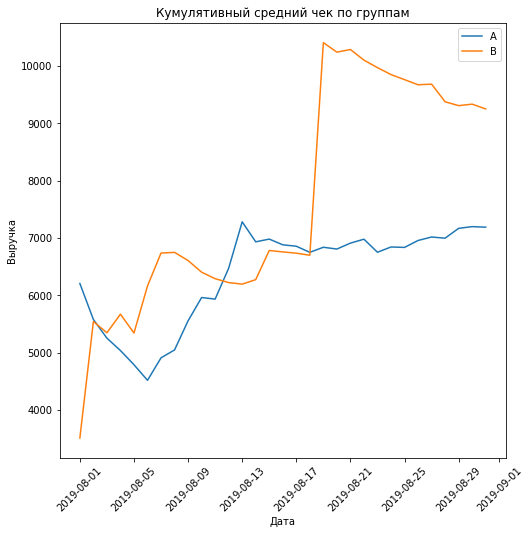

In [18]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.figure(figsize=(8,8))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel("Выручка")
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Та же картина, резкий рост в районе 17 числа у группы В

### Относительное изменение среднего чека по группам

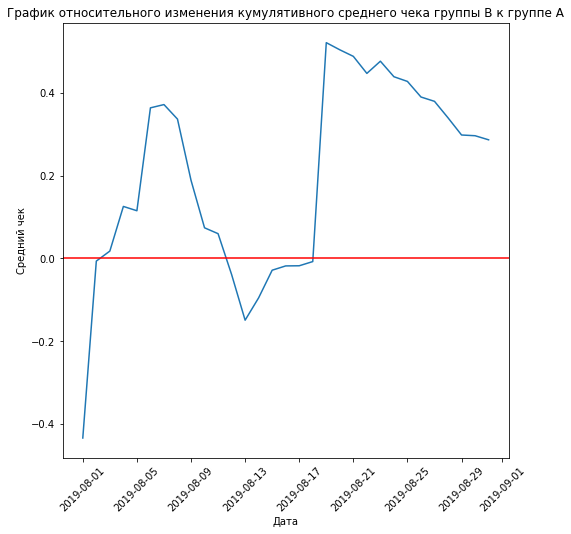

In [19]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(8,8))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

И ещё раз таже картина - резкий рост в районе 17 числа \
Все три графика говорят об одном, есть выбросы

### Кумулятивная конверсия по группам

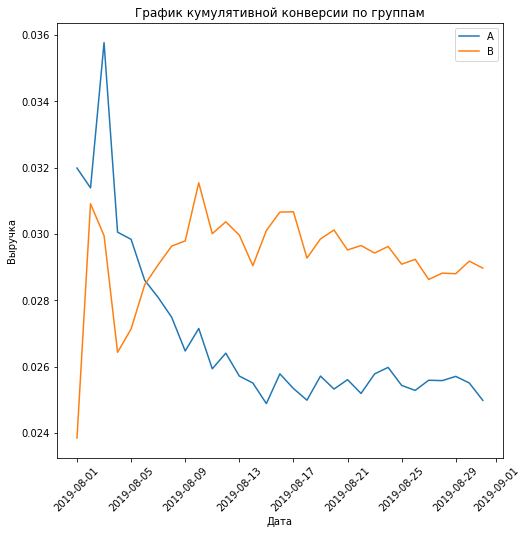

In [20]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.figure(figsize=(8,8))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

А вот график конверсии не показывает резких выбросов \
После нормализации начальных пиков графики ведут себя более-менее прилично

### Относительное изменение кумулятиной конверсии по группам

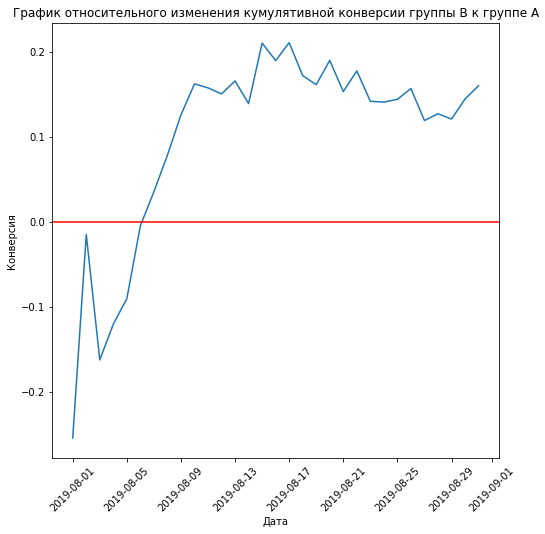

In [21]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(8,8))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()

Однозначно можно сказать, что конверсия группы В лучше группы А

### Точечный график количества заказов

In [22]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})

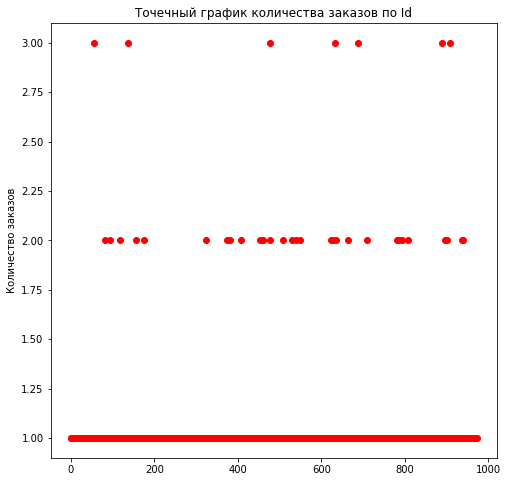

In [23]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.figure(figsize=(8,8))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.title('Точечный график количества заказов по Id')
plt.ylabel('Количество заказов')
plt.xlabel('')
plt.show()

Больше всего единичных заказов, есть выбросы больше десяти штук

### Считаем перцентили количества заказов

In [24]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 1.00
99 перцентиль: 2.00


В целом можно сказать, что всё, что больше 4 заказов - аномалия, будем избавляться

In [25]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorid'].to_list()

### Точечный график суммы заказов

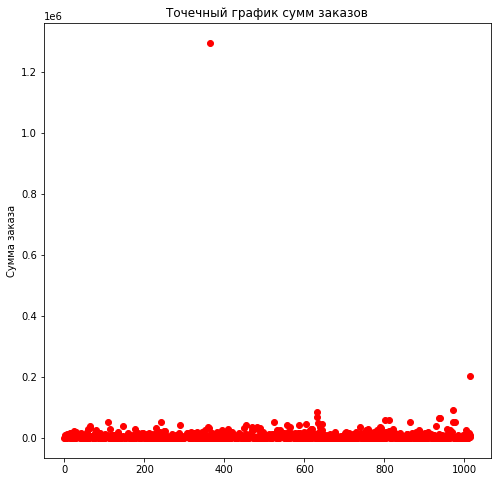

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(8,8))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Точечный график сумм заказов')
plt.ylabel("Сумма заказа")
plt.show()

Видно только два аномальных значения, всё остальное лежит в общей массе

In [27]:
orders.query('revenue > 100000')

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


А вот и выбросы в районе 17 числа, которые привели к скачкам

### Считаем перцентили выручки

In [28]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 17990.00
95 перцентиль: 26785.00
99 перцентиль: 53904.00


Спокойно можно брать за аномалии всё, что выше 99 процентиля

### Стат. значимость различий между конверсиями по группам по неочищенным данным

In [29]:
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [30]:
# Зададим рассчёт z-значения функцией
def z_val(diff, comb, leads):
    z_value = diff / math.sqrt(comb * (1 - comb) * (1 / leads[0] + 1 / leads[1]))
    return(z_value)

Воспользуемся Z-критерием для разности двух долей. \
H0: Конверсия в группе A РАВНА конверсии в группе B \
H1: Конверсия в группе A НЕ РАВНА конверсии в группе B 

In [31]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_val(difference, combined, leads)))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


Всё же конверсия группы В выше конверсии группы А

### Стат. значимость различий между средним чеком групп по сырым данным

Воспользуемся критерием Манна-Уитни \
H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B \
H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B 

In [32]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.8294908998149533
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [33]:
orders[orders['group']=='A']['revenue'].mean()

7189.4358974358975

In [34]:
orders[orders['group']=='B']['revenue'].mean()

9249.94890510949

Средний чек группы В больше

По "грязным" данным группа В превосходит группу А, но это только пока. Стоит посмотреть и после очистики

### Стат. значимость различий конверсий группы по очищенным данным

In [35]:
orders_temp = orders[~orders['visitorid'].isin(outlaws_1p)]
conversion_clear = (orders_temp.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

Воспользуемся Z-критерием для разности двух долей. \
H0: Конверсия в группе A РАВНА конверсии в группе B \
H1: Конверсия в группе A НЕ РАВНА конверсии в группе B 

In [36]:
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_val(difference, combined, leads)))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


И опять конверсия В больше

### Стат. значимость различий средних чеков групп по очищенным данным

In [37]:
orders_clear = orders.query('revenue <= 58233')

Воспользуемся критерием Манна-Уитни \
H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B \
H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B

In [38]:
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.9006884356560738
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [39]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()

6504.548596112311

In [40]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()

6298.827205882353

Даже после очистки средний чек выше у группы В, но статистически разница уже меньше

### Решение на основе анализа

Группа В статистически лучше группы А \
Возможно стоит продлить тест на некоторое время и посмотреть на результат точнее, если позволяет бюджет, если нет - принимаем решение о изменении

По итогу: \
Посмотрели на распределение данных, конверсию и корреляцию до очистки и после \
Большая часть заказов лежит в общем русле, но есть и достаточно крупные, относительно общего числа, выбросы \
Проверили стат. значимость до очистки и после \
Можно сказать, что по "грязным" данным группа В значительно лучше группы А, но после чистки ситуация чуть исправилась. Определённо сказать, что какая-то группа сильнее - нельзя